In [2]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report, plot_roc_curve

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import GridSearchCV
from google_drive_downloader import GoogleDriveDownloader as gdd


# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

# Hiperparâmetros

## Hiperparâmetros

Alguns parâmetros de algortitmos de Machine Learning não são treinados, mas influenciam diretamente nas métricas do nosso modelo. Esses parâmetros são conhecidos como Hiperparâmetros. 

Por exemplo na Arvore de Decisões temos o número de camadas no sklearn.

Uma forma de trabalhar com os hiperparâmetros é com o **Grid Search**, que é uma técnica de busca exaustiva para encontrar os melhores valores para os hiperparâmetros.


Para essa técnica vamos usar a validação cruzada, onde iremos encontrar os melhores parâmetros para o nosso modelo usando apenas o conjunto de treinamento. A imagem a seguir ilustra a divisão do conjunto de dados quando usamos a validação cruzada:



<center>
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500">

fonte: https://scikit-learn.org/stable/modules/cross_validation.html

O objetivo do Grid Search é fazer uma busca para encontar os melhores hiperparâmetros do nosso moelo para posteriormente retreinar o modelo usando o resultado obtido por ele. A imagem a seguir ilustra esse processo:




<center>
<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="500">

fonte: https://scikit-learn.org/stable/modules/cross_validation.html

Vamos fazer um exemplo com um conjunto de dados para classificação com o objetivo de verificar os conceitos de hiperparâmetros:

## Exemplo Regressão

Vamos agora ver um exemplo com modelos de regressão

### Recebendo os dados:

In [3]:
# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '1jmwTi7Xao7ZzOTwFGV9S68b-HXHbdWci'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './data_2.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
dados_reg = pd.read_csv("data_2.csv")

### Analisando os nossos dados

In [4]:
dados_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
dados_reg.shape

(1030, 9)

In [6]:
dados_reg.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
dados_reg.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd95d6d56d0>,
      dtype=object)

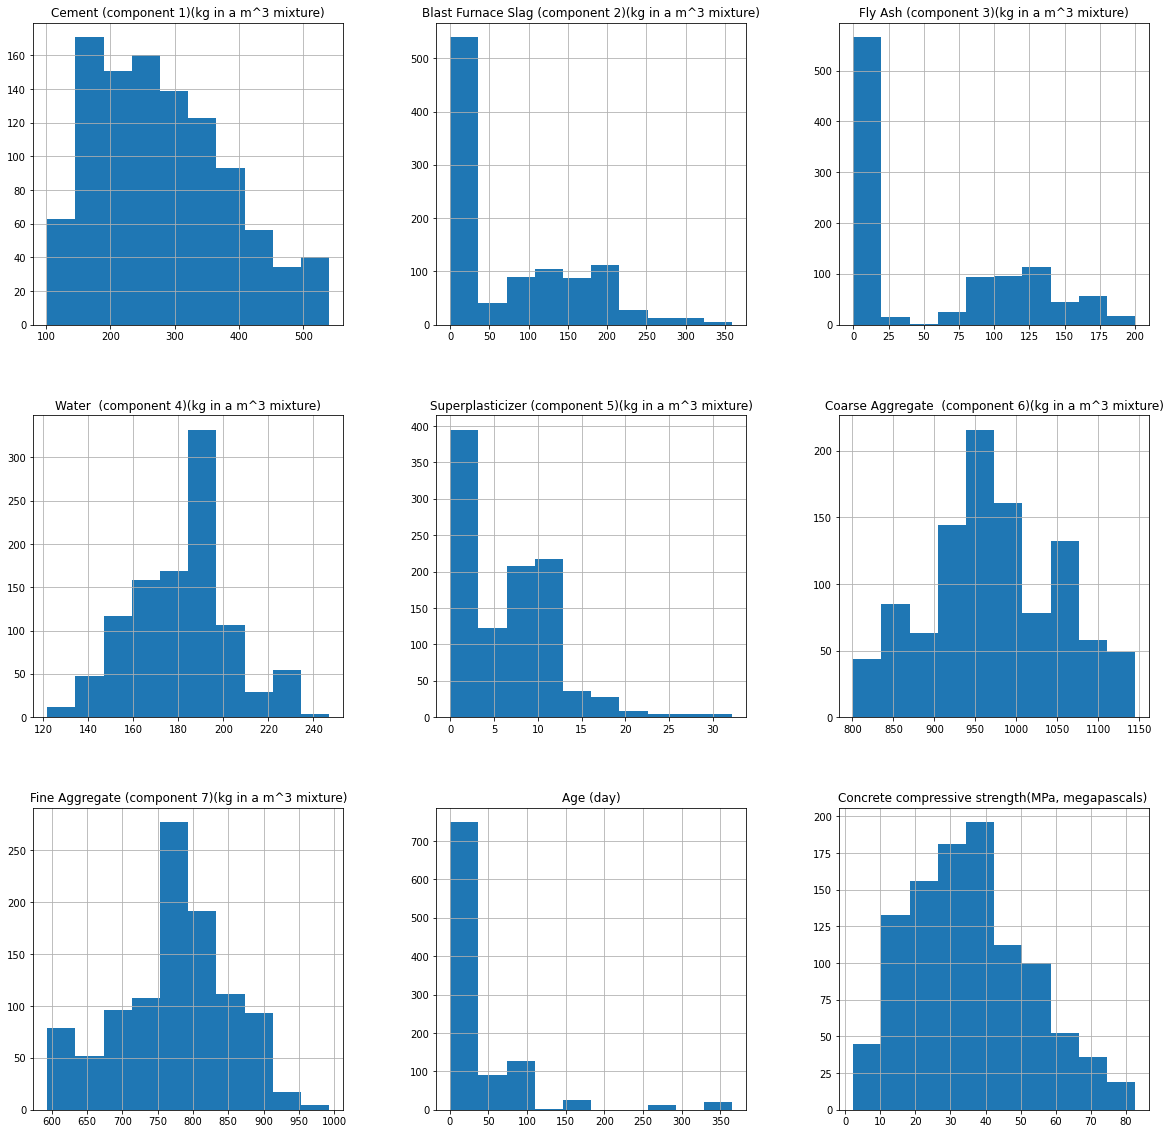

In [8]:
dados_reg.hist(figsize=(20,20))

In [9]:
dados_reg.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

### Dividindo o nosso conjunto de dados

In [10]:
# Dividindo X e y (Entrada e saída de dados)
X = dados_reg.drop(columns=["Concrete compressive strength(MPa, megapascals) "]) #Excluindo a coluna de charges do conjunto de dados
y = dados_reg["Concrete compressive strength(MPa, megapascals) "] # Em y colocamos apenas os valores que desejamos para a saída dos dados.

# Dividindo dados para treino e dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, # 30% dos dados serão utilizados no conjunto de teste.
                                                    random_state= 42 # Modelo de divisão número 42
                                                    )

scale = MinMaxScaler().fit(X_train)

X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

### Treinando os modelos e obtendo suas métricas

Vamos começar com a Regressão Linear. Para esse modelo não iremos usar nenhum hiperparâmetro.

In [11]:
# Treinando o modelo
model_RL = LinearRegression().fit(X_train, y_train)
y_pred_RL = model_RL.predict(X_test)

In [12]:
print(f'r2 score: {r2_score(y_test,y_pred_RL)}')
print(f'MSE: {mean_squared_error(y_test,y_pred_RL)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred_RL)}')

r2 score: 0.5943642890037386
MSE: 109.7561406373491
MAE: 8.298641626767525


Árvore de Decisões para os modelos de Regressão:

In [13]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()

# Cria o GridSearchCV
parametros = {'max_depth':range(2,20), 'min_samples_leaf':range(2,10)}
modelo_GS = GridSearchCV(modelo, parametros,)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

{'max_depth': 19, 'min_samples_leaf': 5}

In [14]:
# Treinando o modelo
model_DTR = DecisionTreeRegressor(max_depth = 12, min_samples_leaf = 5)
model_DTR.fit(X_train, y_train)
y_pred_DTR = model_DTR.predict(X_test)

print(f'r2 score: {r2_score(y_test,y_pred_DTR)}')
print(f'MSE: {mean_squared_error(y_test,y_pred_DTR)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred_DTR)}')

r2 score: 0.8151797623441212
MSE: 50.008309048938465
MAE: 4.9450876460730635


Modelo de Gradient Boosting Regressor:

In [15]:
modelo = GradientBoostingRegressor()

# Cria o GridSearchCV
parametros = {'min_samples_leaf':range(2,10), 'max_depth' : range(3,10)}
modelo_GS = GridSearchCV(modelo, parametros,)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

{'max_depth': 7, 'min_samples_leaf': 9}

In [16]:
# Treinando o modelo
model_gbc = GradientBoostingRegressor(max_depth = 8, min_samples_leaf = 9)
model_gbc.fit(X_train, y_train)
y_pred_DTR = model_gbc.predict(X_test)

print(f'r2 score: {r2_score(y_test,y_pred_DTR)}')
print(f'MSE: {mean_squared_error(y_test,y_pred_DTR)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred_DTR)}')

r2 score: 0.9212253543160425
MSE: 21.314694086254853
MAE: 3.0707611793797756


## Exemplo Classificadores

Os dados do exemplo a seguir podem ser vistos em: https://www.kaggle.com/datasets/kukuroo3/body-performance-data

### Recebendo os dados:

In [ ]:
# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '1k8p7DtV5wXCh9XSgazTWxcqzSAYB_685'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './data.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
dados = pd.read_csv("data.csv", sep = ',')

736.0 KiB Done.


### Analisando os nossos dados

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [ ]:
dados.shape

(13393, 12)

In [ ]:
dados.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
dados.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c4f02b850>,
      dtype=object)

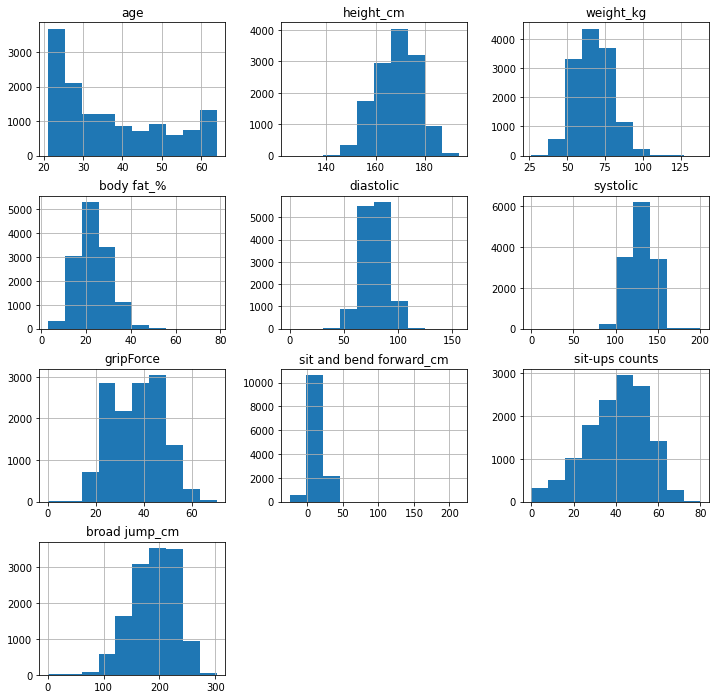

In [ ]:
dados.hist(figsize=(12,12))

In [ ]:
dados.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [ ]:
dados["class"].value_counts()

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [ ]:
dados["gender"].value_counts()

M    8467
F    4926
Name: gender, dtype: int64

In [ ]:
dados["gender"] = dados["gender"].replace({'M':1,
                         'F':0})
dados["gender"].value_counts()

1    8467
0    4926
Name: gender, dtype: int64

As saídas podem ser mantidas em A,B,C e D, pois o sklearn aceita que a classe a ser estimada possua valores categóricos.

### Dividindo o nosso conjunto de dados

In [ ]:
# Dividindo X e y (Entrada e saída de dados)
X = dados.drop(columns=['class']) #Excluindo a coluna de charges do conjunto de dados
y = dados["class"] # Em y colocamos apenas os valores que desejamos para a saída dos dados.

# Dividindo dados para treino e dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, # 30% dos dados serão utilizados no conjunto de teste.
                                                    random_state= 42 # Modelo de divisão número 42
                                                    )

scale = MinMaxScaler().fit(X_train)

X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

### Treinando os modelos e obtendo suas métricas

Obs.: TODAS AS ETAPAS QUE FORAM REALIZADOS O GRID SEARCH EXIGEM UM TEMPO CONSIDERÁVEL DE EXECUÇÃO PARA SEREM CONCLUÍDAS PARA O CONJUNTO DE DADOS SELECIONADO PARA ESSA AULA. RECOMENDA-SE EXECUTAR APENAS OS TREINAMENTOS COM OS RESULTADOS OBTIDOS NA EXECUÇÃO PRÉVIA DO GRID SEARCH

Vamos começar com o k-NN:

In [ ]:
# Definindo o modelo
modelo = KNeighborsClassifier()

# Cria o GridSearchCV
parametros = {'n_neighbors':range(3,50)}
modelo_GS = GridSearchCV(modelo, parametros)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

{'n_neighbors': 42}

In [ ]:
# Fazendo o k-NN
# n_neighbors é o valor da quantidade de vizinhos que será considerada
knn_clf = KNeighborsClassifier(n_neighbors=42)
knn_clf.fit(X_train, y_train)

# Fazendo as predições
y_pred_knn = knn_clf.predict(X_test)

# obtendo as métricas:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           A       0.61      0.78      0.69      1040
           B       0.41      0.44      0.43       966
           C       0.52      0.52      0.52       969
           D       0.90      0.60      0.72      1043

    accuracy                           0.59      4018
   macro avg       0.61      0.59      0.59      4018
weighted avg       0.62      0.59      0.59      4018



Árvore de Decisões:

In [ ]:
# Definindo o modelo
modelo = DecisionTreeClassifier()

# Cria o GridSearchCV
parametros = {'max_depth':range(2,20), 'min_samples_leaf':range(2,10)}
modelo_GS = GridSearchCV(modelo, parametros)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

{'max_depth': 12, 'min_samples_leaf': 8}

In [ ]:
# Fazendo o DecisionTreeClassifier
# max_depth: Número de ramos da árvore
# min_samples_leaf: Número minimo de exemplos para dividir os dado
dtc_clf = DecisionTreeClassifier(max_depth=12,min_samples_leaf=8)
dtc_clf.fit(X_train, y_train)

# Fazendo as predições
y_pred_dtc = dtc_clf.predict(X_test)

# obtendo as métricas:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           A       0.71      0.76      0.73      1040
           B       0.53      0.59      0.56       966
           C       0.66      0.61      0.63       969
           D       0.86      0.76      0.81      1043

    accuracy                           0.68      4018
   macro avg       0.69      0.68      0.68      4018
weighted avg       0.69      0.68      0.69      4018



Random Forest:

In [ ]:
# Definindo o modelo
modelo = RandomForestClassifier()

# Cria o GridSearchCV
parametros = {'max_depth':range(2,10), 'min_samples_leaf':range(2,10)}
modelo_GS = GridSearchCV(modelo, parametros)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

{'max_depth': 9, 'min_samples_leaf': 4}

In [ ]:
# Fazendo o RandomForestClassifier
# max_depth: Número de ramos da árvore
# min_samples_leaf: Número minimo de exemplos para dividir os dado
# n_estimatros: número de árvores que serão criadas para estimar as saídas
rfc_clf = RandomForestClassifier(max_depth=9,min_samples_leaf=4)
rfc_clf.fit(X_train, y_train)

# Fazendo as predições
y_pred_rfc = rfc_clf.predict(X_test)

# obtendo as métricas:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           A       0.72      0.81      0.77      1040
           B       0.56      0.59      0.58       966
           C       0.69      0.64      0.66       969
           D       0.89      0.79      0.84      1043

    accuracy                           0.71      4018
   macro avg       0.72      0.71      0.71      4018
weighted avg       0.72      0.71      0.71      4018



Gradient Boosting Classifier:




In [ ]:
# Definindo o modelo
modelo = GradientBoostingClassifier()

# Cria o GridSearchCV
parametros = {'max_depth':range(2,10), 'min_samples_leaf':range(2,10)}
modelo_GS = GridSearchCV(modelo, parametros)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

In [ ]:
# Fazendo o GradientBoostingClassifier
# n_estimatros: número de árvores que serão criadas para estimar as saídas
gbc_clf = GradientBoostingClassifier(max_depth=4,min_samples_leaf=2)
gbc_clf.fit(X_train, y_train)

# Fazendo as predições
y_pred_gbc = gbc_clf.predict(X_test)

# obtendo as métricas:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           A       0.74      0.83      0.78      1040
           B       0.59      0.62      0.60       966
           C       0.73      0.68      0.70       969
           D       0.92      0.83      0.87      1043

    accuracy                           0.74      4018
   macro avg       0.74      0.74      0.74      4018
weighted avg       0.75      0.74      0.74      4018



Support Vector Machine:

In [ ]:
# Definindo o modelo
modelo = SVC()

# Cria o GridSearchCV
parametros = {'kernel' : ['rbf', 'linear', 'poly', 'sigmoid']}
modelo_GS = GridSearchCV(modelo, parametros)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

{'kernel': 'poly'}

In [ ]:
# Fazendo o SVC
# kernel: Método para realizar uma divisão dos dados caso ela não exista
svc_clf = SVC(kernel='poly', probability = True)
svc_clf.fit(X_train, y_train)

# Fazendo as predições
y_pred_svc = svc_clf.predict(X_test)

# obtendo as métricas:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           A       0.73      0.75      0.74      1040
           B       0.50      0.50      0.50       966
           C       0.60      0.66      0.63       969
           D       0.88      0.77      0.82      1043

    accuracy                           0.67      4018
   macro avg       0.68      0.67      0.67      4018
weighted avg       0.68      0.67      0.68      4018



# Ensembles

## Classificadores por votação

Podemos criar um modelo que utiliza diversos modelos para realizar a previsão. Isso são os métodos de ensambles. Para a classificação podemos ter a previsão sendo escolhida a partir da maioria das previsões conforme a imagem abaixo:


<img src='https://blog.kakaocdn.net/dn/cxK7KX/btqznQcAk6V/aOHyC1cn1ewVuk1L2cpPG1/img.png' width=500>

Outra fora para fazer isso é utilizar a previsão de cada modelo e com isso utilizar a média das previsões, a imagem abaixo ilustra isso.

<img src='https://blog.kakaocdn.net/dn/bqMaUT/btqznQXVLjj/ptcExgp4hOjGKOKIEvTIbK/img.png' width=500>

In [ ]:
# Dividindo X e y (Entrada e saída de dados)
X = dados.drop(columns=['class']) #Excluindo a coluna de charges do conjunto de dados
y = dados["class"] # Em y colocamos apenas os valores que desejamos para a saída dos dados.

# Dividindo dados para treino e dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, # 30% dos dados serão utilizados no conjunto de teste.
                                                    random_state= 42 # Modelo de divisão número 42
                                                    )

scale = MinMaxScaler().fit(X_train)

X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

Trabalhando com um modelo de votação:

In [ ]:
from sklearn.ensemble import  VotingClassifier

In [ ]:
eclf1 = VotingClassifier(estimators=[
        ('AD', svc_clf), ('RFC', rfc_clf), ('GBC',gbc_clf)], voting='hard')
eclf1.fit(X_train, y_train)

VotingClassifier(estimators=[('AD', SVC(kernel='poly')),
                             ('RFC',
                              RandomForestClassifier(max_depth=9,
                                                     min_samples_leaf=4)),
                             ('GBC',
                              GradientBoostingClassifier(max_depth=4,
                                                         min_samples_leaf=2))])

In [ ]:
y_pred_eclf1 = eclf1.predict(X_test)

# obtendo as métricas:
print(classification_report(y_test,y_pred_eclf1))

              precision    recall  f1-score   support

           A       0.73      0.81      0.77      1040
           B       0.58      0.61      0.59       966
           C       0.71      0.69      0.70       969
           D       0.92      0.81      0.86      1043

    accuracy                           0.73      4018
   macro avg       0.74      0.73      0.73      4018
weighted avg       0.74      0.73      0.73      4018



Trabalhando com um modelo com a média das saídas:

In [ ]:
eclf2 = VotingClassifier(estimators=[
        ('AD', svc_clf), ('RFC', rfc_clf), ('GBC',gbc_clf)], voting='soft')
eclf2.fit(X_train, y_train)

VotingClassifier(estimators=[('AD', SVC(kernel='poly', probability=True)),
                             ('RFC',
                              RandomForestClassifier(max_depth=9,
                                                     min_samples_leaf=4)),
                             ('GBC',
                              GradientBoostingClassifier(max_depth=4,
                                                         min_samples_leaf=2))],
                 voting='soft')

In [ ]:
y_pred_eclf2 = eclf2.predict(X_test)

# obtendo as métricas:
print(classification_report(y_test,y_pred_eclf2))

              precision    recall  f1-score   support

           A       0.75      0.80      0.77      1040
           B       0.57      0.60      0.59       966
           C       0.71      0.70      0.71       969
           D       0.91      0.82      0.87      1043

    accuracy                           0.74      4018
   macro avg       0.74      0.73      0.73      4018
weighted avg       0.74      0.74      0.74      4018



## Classificadores com Stacking

Nesse modelo as previsões dos modelos anteriores são combinadas por um outro modelo para obter a saída final. Podem ser criadas várias camadas com modelos diferentes.

<img src='https://miro.medium.com/max/1892/0*GHYCJIjkkrP5ZgPh.png' width=800>

In [ ]:
from sklearn.ensemble import StackingClassifier
clf_stacking = StackingClassifier(estimators=[('SVC',svc_clf), ('RFC',rfc_clf), ('GBC',gbc_clf)], final_estimator = LogisticRegression())
clf_stacking.fit(X_train, y_train)
y_pred_stacking_clf = clf_stacking.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# obtendo as métricas:
print(classification_report(y_test,y_pred_stacking_clf))

              precision    recall  f1-score   support

           A       0.76      0.81      0.79      1040
           B       0.59      0.62      0.60       966
           C       0.73      0.69      0.71       969
           D       0.91      0.83      0.87      1043

    accuracy                           0.74      4018
   macro avg       0.75      0.74      0.74      4018
weighted avg       0.75      0.74      0.75      4018



## Regressores por votação

In [ ]:
# Dividindo X e y (Entrada e saída de dados)
X = dados_reg.drop(columns=["Concrete compressive strength(MPa, megapascals) "]) #Excluindo a coluna de charges do conjunto de dados
y = dados_reg["Concrete compressive strength(MPa, megapascals) "] # Em y colocamos apenas os valores que desejamos para a saída dos dados.

# Dividindo dados para treino e dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, # 30% dos dados serão utilizados no conjunto de teste.
                                                    random_state= 42 # Modelo de divisão número 42
                                                    )

scale = MinMaxScaler().fit(X_train)

X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

A saída do modelos será obtida a partir de uma média das entradas dos modelos.

In [ ]:
from sklearn.ensemble import VotingRegressor
ereg = VotingRegressor(estimators=[('Reg_Lin', model_RL), ('Arvore_Regressao', model_DTR), ('RFR', RandomForestRegressor())])
ereg.fit(X_train, y_train)


VotingRegressor(estimators=[('Reg_Lin', LinearRegression()),
                            ('Arvore_Regressao',
                             DecisionTreeRegressor(max_depth=12,
                                                   min_samples_leaf=5)),
                            ('RFR', RandomForestRegressor())])

In [ ]:
y_pred_ereg = ereg.predict(X_test)

# obtendo as métricas:
print(f'r2 score: {r2_score(y_test,y_pred_ereg)}')
print(f'MSE: {mean_squared_error(y_test,y_pred_ereg)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred_ereg)}')

r2 score: 0.8528172692485081
MSE: 39.824423880417974
MAE: 4.633451497722703


## Regressores por Stacking


In [ ]:
from sklearn.ensemble import StackingRegressor
estimators = [('Reg_Lin', model_RL), ('Arvore_Regressao',model_DTR)]
reg = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor())
reg.fit(X_train,y_train)

StackingRegressor(estimators=[('Reg_Lin', LinearRegression()),
                              ('Arvore_Regressao',
                               DecisionTreeRegressor(max_depth=12,
                                                     min_samples_leaf=5))],
                  final_estimator=GradientBoostingRegressor())

In [ ]:
# Fazendo as predições
y_pred_reg = reg.predict(X_test)

# obtendo as métricas:
print(f'r2 score: {r2_score(y_test,y_pred_reg)}')
print(f'MSE: {mean_squared_error(y_test,y_pred_reg)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred_reg)}')

r2 score: 0.850707532394457
MSE: 40.39527247333972
MAE: 4.707894853593573
